In [127]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [128]:
def extract_positions_from_log(file_path, field):
    positions = []

    # Regex to match the [POS] line and extract x, y, z as floats
    pattern = re.compile(rf"\[{field}\]\[([-\d.eE]+)d,([-\d.eE]+)d,([-\d.eE]+)d\]")

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                x, y, z = map(float, match.groups())
                positions.append((x, y, z))
    return np.array(positions)

In [185]:
positions = extract_positions_from_log("../data/movements/knockback_normal_ground.log", "xyz")
velocities = extract_positions_from_log("../data/movements/knockback_normal_ground.log", "vel")

y = positions[:, 1]

diffs = np.diff(positions, axis=0)

vy = diffs[:, 1]
vh = np.linalg.norm(diffs[:, [0, 2]], axis=1)

vvy = velocities[:, 1]
vvh = np.linalg.norm(velocities[:, [0, 2]], axis=1)

print(vh, vvh)

print(np.mean(vh), np.mean(vvh))

[0.         0.39350604 0.21485432 0.19551744 0.17792088 0.161908
 0.14733629 0.13404441 0.12198041 0.11100218 0.10101199 0.09192091
 0.05018882 0.0274031  0.01496209 0.0081693  0.00446044 0.
 0.         0.        ] [0.         0.39350604 0.21485432 0.19551744 0.17792088 0.161908
 0.14733629 0.13407602 0.12198041 0.11100218 0.10101199 0.09192091
 0.05018882 0.0274031  0.01496209 0.0081693  0.00446044 0.0024354
 0.         0.         0.        ]
0.09780933128099047 0.09326922109481903


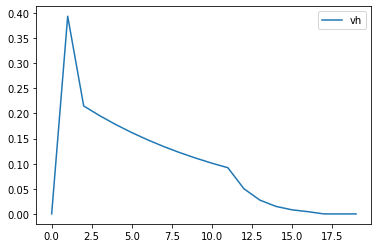

In [130]:
plt.plot(np.arange(len(vh)), vh, label="vh")
plt.legend()

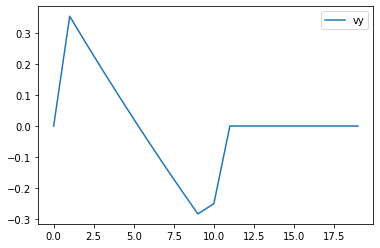

In [131]:
plt.plot(np.arange(len(vy)), vy, label="vy")
plt.legend()

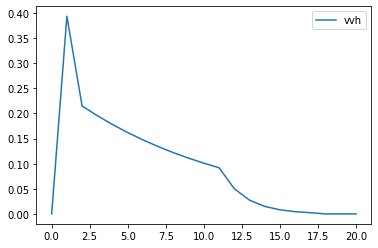

In [132]:
plt.plot(np.arange(len(vvh)), vvh, label="vvh")
plt.legend()

-0.046098079003362886


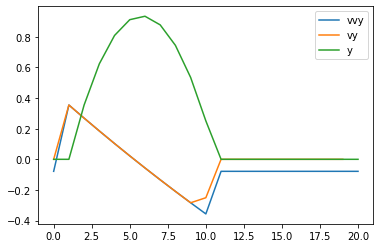

In [133]:
plt.plot(np.arange(len(vvy)), vvy, label="vvy")
plt.plot(np.arange(len(vy)), vy, label="vy")
plt.plot(np.arange(len(y)), y+60, label="y")

plt.legend()
print(np.mean(vvy))

In [252]:
# simulate knockback

g_ground = 0.0784
g_up = 0.0828
g_down = 0.075


jump_strength = 0.42 + g_up

sprint_speed = 0.28

air_fric_rel = 0.0375
jump_boost = 0.19
air_fric = 0.3
air_fric_ground = 1.5

knockup = 0.434
knockback = 0.39

sim_y = y[0] + 60
sim_vy = vvy[0]
sim_vx = vh[0]
sim_vvx = vvh[0]

ys = [sim_y]
vys = [sim_vy]
vxs = [sim_vx]
vvxs = [sim_vvx]

for t in range(1, len(vvy)):


    if sim_y > 0:
        sim_vx -= air_fric * (np.abs(sim_vx)) * 0.088
        sim_vvx -= air_fric * (np.abs(sim_vvx)) * 0.3
    else:
        sim_vx -= air_fric_ground * (np.abs(sim_vx)) * 0.088
        sim_vvx -= air_fric_ground * (np.abs(sim_vvx)) * 0.3
    
    sim_y = np.maximum(sim_y + sim_vy, 0)
    if vvy[t] > 0.35: # one frame after jump input
        sim_vy = knockup
        sim_vvx += knockback
        
    if sim_vy > 0:
        g = g_up
    else:
        g = g_down
        
    sim_vy -= g
    
    if sim_y == 0 and vvy[t] < 0.35:
        sim_vy = -g_down
    
    # if sprinting
    # np.maximum(sim_vx, sprint_speed)
    sim_vvx = np.maximum(sim_vvx, 0)


    
    ys.append(sim_y)
    vys.append(sim_vy)
    
    vxs.append(sim_vx)
    vvxs.append(sim_vvx)
    

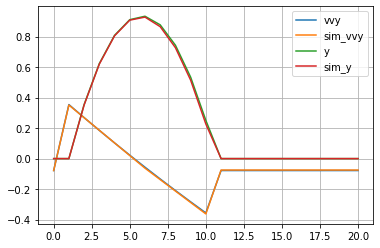

In [253]:
plt.plot(np.arange(len(vvy)), vvy, label="vvy")
plt.plot(np.arange(len(vys)), vys, label="sim_vvy")
plt.plot(np.arange(len(y)), y+60, label="y")
plt.plot(np.arange(len(ys)), ys, label="sim_y")

plt.grid()

plt.legend()


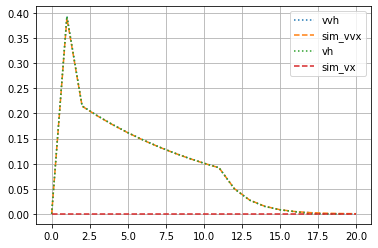

In [254]:
plt.plot(np.arange(len(vvh)), vvh, label="vvh", linestyle=":")
plt.plot(np.arange(len(vvxs)), vvxs, label="sim_vvx", linestyle="--")
plt.plot(np.arange(len(vh)), vh, label="vh", linestyle=":")
plt.plot(np.arange(len(vxs)), vxs, label="sim_vx", linestyle="--")

plt.grid()

plt.legend()